In [1]:
#Importar librerias
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import keras
from keras import layers
from keras import Sequential
from keras.datasets import fashion_mnist  # En este módulo está Fashion-MNIST en formato numpy
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

In [2]:
# importar y cargar el set de datos de MNIST directamente de TensorFlow
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
#Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0 al 9. Estos corresponden a la class de ropa
labels = ['0.T-shirt/top', '1.Trouser', '2.Pullover', '3.Dress', '4.Coat',
               '5.Sandal', '6.Shirt', '7.Sneaker', '8.Bag', '9.Ankle boot']

In [4]:
#muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28
x_train.shape

(60000, 28, 28)

In [5]:
#Hay 10,000 imagenes en el set de pruebas, cada imagen es representada como pixeles de 28x28:
x_test.shape

(10000, 28, 28)

In [6]:
# Como usaremos una red neuronal, se convierte la data en vectores. 
input_shape = (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28 , 28 , 1))
x_test = x_test.reshape((x_test.shape[0], 28 , 28 , 1))
 

In [7]:
# Se normaliza los datos para evitar problemas de inestabilidad numérica. los datos estén representados con floats de 32-bits.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

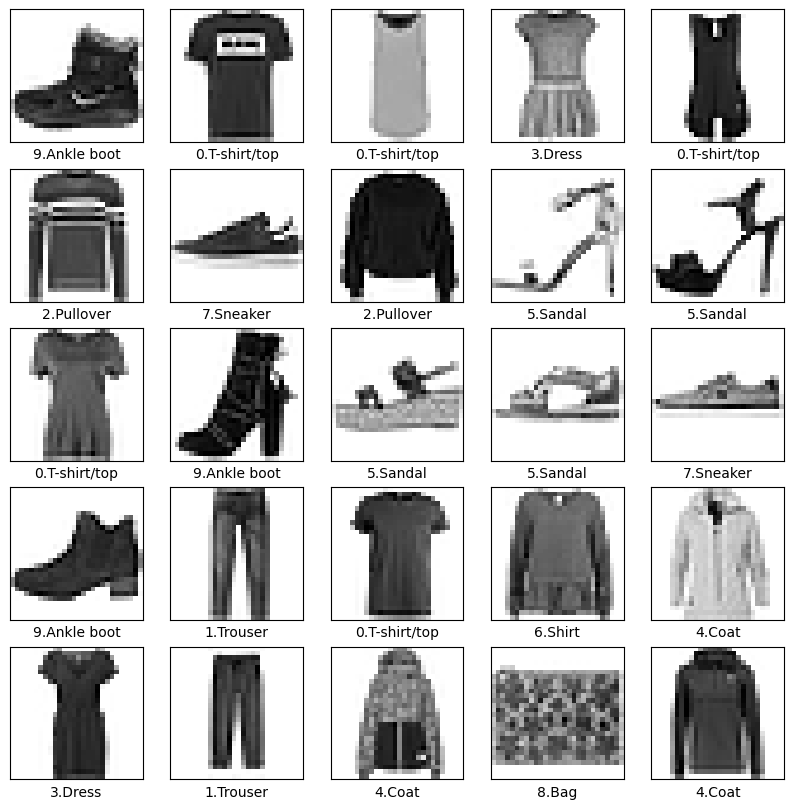

In [8]:
#verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar 
#las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [9]:
# Convertir las etiquetas en vectores one-hot encoded.
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [10]:
# Puesto que es un problema de clasificación múltiple, utilizamos softmax como función de activación de la última capa, ya que
# nos devuelve valores entre 0 y 1 para cada categoría, pudiendo *interpretarlos* como probabilidades.
# Las primeras capas de la red son una combinación de Conv2D y MaxPooling2D, las cuales extraerán distintos features a partir
# de la imagen de entrada. Primero usamos 32 filtros, y luego 64.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),
        layers.Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax'),
    ]
)

In [11]:
#Se muestra resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [12]:
# Se usa Adam como optimizador porque sirve como buena selección por defecto. Como Fashion-MNIST está balanceado, optamos
# por la exactitud (accuracy) como métrica.
batch_size = 128
epochs = 50
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [13]:
# Usaremos 20% de la data de entrenamiento para validar el desempeño de la red en cada epoch.
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8)
H = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs,
              batch_size=batch_size)

Epoch 1/50


375/375 [==============================] - 13s 30ms/step - loss: 0.7011 - accuracy: 0.7494 - val_loss: 0.4152 - val_accuracy: 0.8442
Epoch 2/50
375/375 [==============================] - 12s 31ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.3363 - val_accuracy: 0.8764
Epoch 3/50
375/375 [==============================] - 12s 31ms/step - loss: 0.3949 - accuracy: 0.8608 - val_loss: 0.3236 - val_accuracy: 0.8785
Epoch 4/50
375/375 [==============================] - 12s 31ms/step - loss: 0.3634 - accuracy: 0.8717 - val_loss: 0.3077 - val_accuracy: 0.8863
Epoch 5/50
375/375 [==============================] - 12s 31ms/step - loss: 0.3360 - accuracy: 0.8815 - val_loss: 0.2990 - val_accuracy: 0.8892
Epoch 6/50
375/375 [==============================] - 12s 31ms/step - loss: 0.3184 - accuracy: 0.8865 - val_loss: 0.2763 - val_accuracy: 0.9003
Epoch 7/50
375/375 [==============================] - 12s 31ms/step - loss: 0.3015 - accuracy: 0.8917 - val_loss: 0.2788 - val_accurac

In [14]:
#evaluar el rendimiento del modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Perdida/Loss Test:', score[0])
print('Precision/Accuracy Test:', score[1])

Perdida/Loss Test: 0.42146244645118713
Precision/Accuracy Test: 0.9059000015258789


In [15]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Perdida/Loss Train:', score[0])
print('Precision/Accuracy Train:', score[1])

Perdida/Loss Train: 0.04058331251144409
Precision/Accuracy Train: 0.9854375123977661


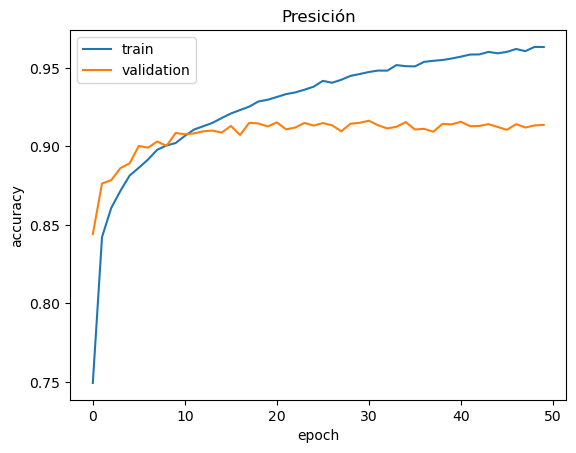

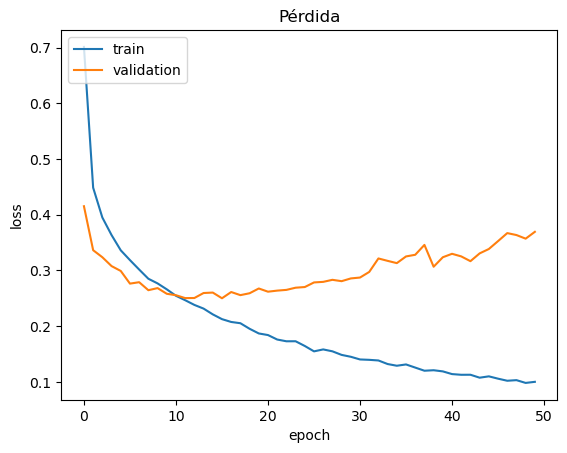

In [16]:

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Presición')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
y_test_pred = model.predict(x_test, batch_size=batch_size)
y_pred_classes = np.argmax(y_test_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_test.argmax(axis=1),
                            y_test_pred.argmax(axis=1),
                            target_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
                                          'Sneaker', 'Bag', 'Ankle boot']))


79/79 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.87      0.84      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.74      0.75      0.74      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



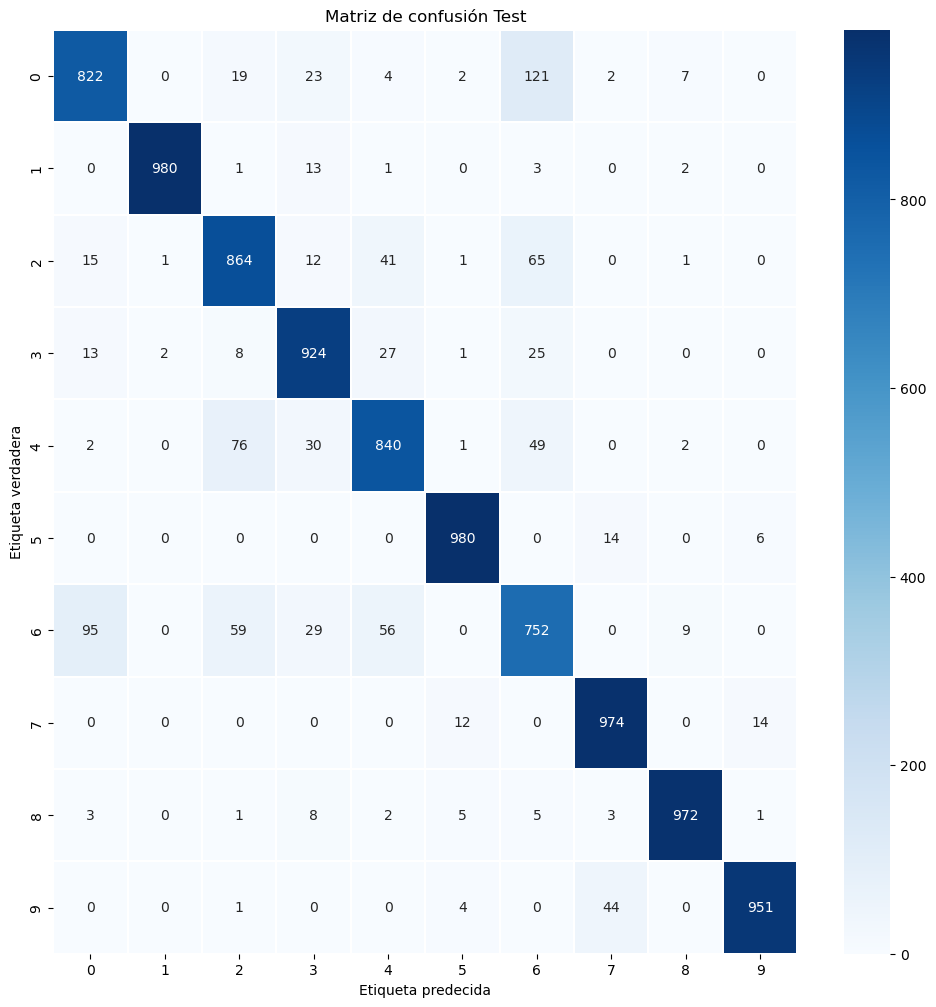

In [18]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "Blues", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Etiqueta predecida")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de confusión Test")
plt.show()

In [19]:
y_train_pred = model.predict(x_train, batch_size=batch_size)
y_pred_classes_train = np.argmax(y_train_pred, axis = 1)
y_true_train = np.argmax(y_train, axis = 1)
print(classification_report(y_train.argmax(axis=1),
                            y_train_pred.argmax(axis=1),
                            target_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
                                          'Sneaker', 'Bag', 'Ankle boot']))


375/375 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.98      0.96      0.97      4805
     Trouser       1.00      1.00      1.00      4776
    Pullover       0.98      0.97      0.97      4772
       Dress       0.99      0.99      0.99      4809
        Coat       0.97      0.98      0.98      4839
      Sandal       1.00      1.00      1.00      4815
       Shirt       0.95      0.97      0.96      4823
     Sneaker       0.99      1.00      0.99      4763
         Bag       1.00      1.00      1.00      4789
  Ankle boot       1.00      0.99      0.99      4809

    accuracy                           0.99     48000
   macro avg       0.99      0.99      0.99     48000
weighted avg       0.99      0.99      0.99     48000



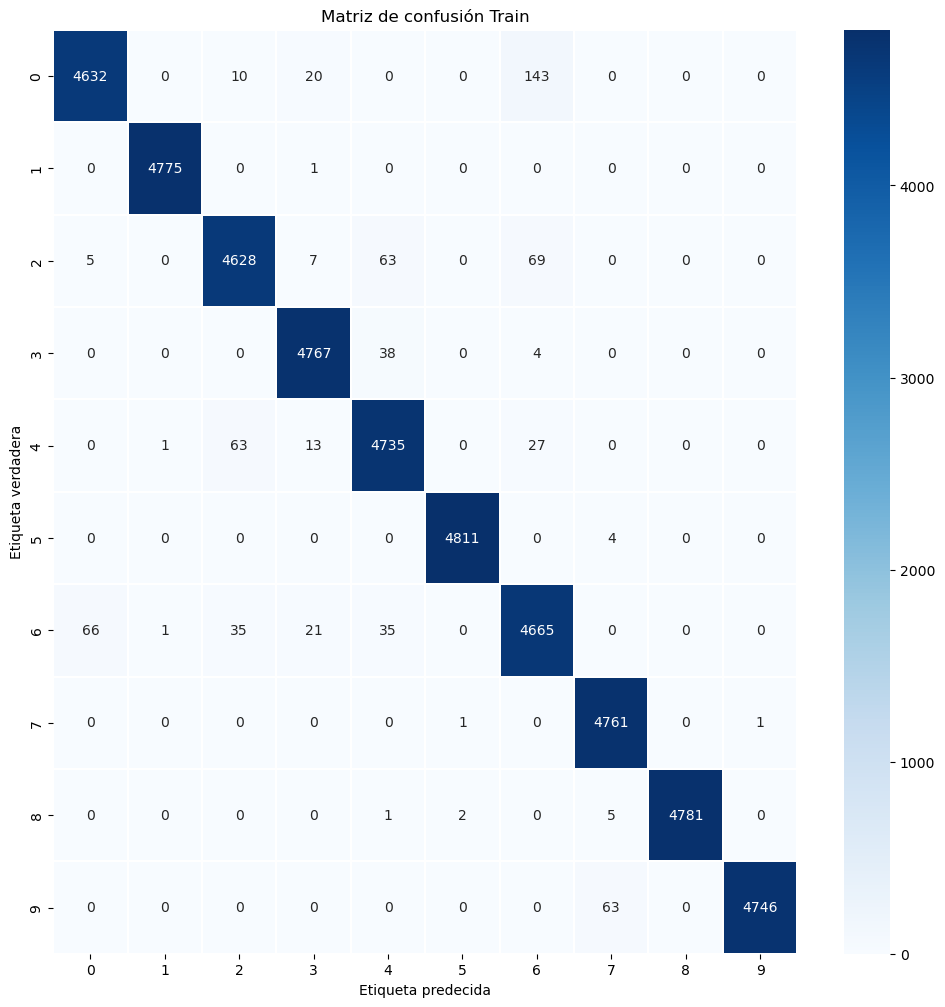

In [20]:
confusion_mtx = confusion_matrix(y_true_train, y_pred_classes_train) 
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "Blues", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Etiqueta predecida")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de confusión Train")
plt.show()